# Python для сбора и анализа данных 

*Алла Тамбовцева*

## Практикум 6.1. Парсинг с `BeautifulSoup`: тэги и атрибуты

Мы уже немного познакомились со структурой html-страниц, теперь попробуем выгрузить информацию из более интересной страницы, а точнее, с сайта [nplus1.ru](https://nplus1.ru/). Наша задача – выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в файл Excel.

Для работы нам снова понадобится модуль `requests` для отправки запросов, для «подключения» к странице и получения ее содержимого в виде строки, и функция `BeautifulSoup` из библиотеки `bs4` для удобного поиска по полученной строке:

In [1]:
import requests
from bs4 import BeautifulSoup

Сохраним ссылку на главную страницу в переменную `main` и отправим запрос к ней с помощью функции `get()` из `requests`:

In [2]:
main = "https://nplus1.ru/"
page = requests.get(main)

In [3]:
# код 200 – ответ получен, ошибки нет
page

<Response [200]>

Заберём исходный код страницы и преобразуем строку с ним в объект `BeautifulSoup`:

In [4]:
soup = BeautifulSoup(page.text)

In [5]:
# soup

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Найдем кусочки кода HTML, соответствующие всем ссылкам на главной странице сайта:

In [6]:
links_raw = soup.find_all("a")
links_raw[10:20]  # несколько штук для примера

[<a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=880">Астрономия</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=768">Генетика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=890">Математика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=871">Космонавтика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=876">Археология</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=775">Нейронауки</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=767">На мышах</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=771">Звук</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search

Каждый элемент возвращаемого списка имеет тип `BeautifulSoup` и структуру, очень похожую на словарь. Например, ссылка `<a class="hover:underline transition-colors duration-75" href="/search/empty/768">Генетика</a>` изнутри выглядит как словарь следующего вида:

    {'href' : '/search/empty/768', 
     'class' : 'hover:underline transition-colors duration-75'}.
    
Как мы помним, значение по ключу из словаря можно вызвать с помощью метода `.get()`. Давайте извлечем значения по ключу `href` из каждого элемента списка `links`:

In [7]:
links = [li.get("href") for li in links_raw] 
links[10:20]  # несколько штук для примера

['https://nplus1.ru/search?tags=880',
 'https://nplus1.ru/search?tags=768',
 'https://nplus1.ru/search?tags=890',
 'https://nplus1.ru/search?tags=871',
 'https://nplus1.ru/search?tags=876',
 'https://nplus1.ru/search?tags=775',
 'https://nplus1.ru/search?tags=767',
 'https://nplus1.ru/search?tags=771',
 'https://nplus1.ru/search?tags=772',
 'https://nplus1.ru/search?tags=778']

Ссылок в списке выше много. Но нам нужны только новости – ссылки, которые начинаются с `https://nplus1.ru/news`. Создадим пустой список `news` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [8]:
news = []
for li in links:
    if "https://nplus1.ru/news/" in li:
        news.append(li)

In [9]:
news[0:10]

['https://nplus1.ru/news/2024/04/04/chicks-molyneuxs-problem',
 'https://nplus1.ru/news/2024/04/06/antibiotic-prophylaxis-infective-endocarditis',
 'https://nplus1.ru/news/2024/04/06/fmt-in-pd',
 'https://nplus1.ru/news/2024/04/06/gw-bh-ns-or-no',
 'https://nplus1.ru/news/2024/04/05/gan-microring-single-photon-source',
 'https://nplus1.ru/news/2024/04/05/otter-vs-raccoon',
 'https://nplus1.ru/news/2024/04/05/brain-atrophy-tooth-loss',
 'https://nplus1.ru/news/2024/04/05/triple-hit-ceftobiprole',
 'https://nplus1.ru/news/2024/04/05/ru-stable-precatalyst',
 'https://nplus1.ru/news/2024/04/05/exo-glory']

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `news` в цикле. Посмотрим на новость с индексом 0, у вас может быть другая, новости обновляются.

In [10]:
link0 = news[0]
print(link0)

https://nplus1.ru/news/2024/04/04/chicks-molyneuxs-problem


### Задача 1

Отправьте запрос к странице по ссылке `link0` с одной новостью, получите результат в виде объекта `BeautifulSoup` и сохраните его как `soup0`.

In [11]:
page0 = requests.get(link0)
soup0 = BeautifulSoup(page0.text)

### Задача 2

Найдите заголовок новости и сохраните его в переменную `title`.

In [12]:
# атрибут text
title = soup0.find("title").text
title = title.replace("\xa0", " ")

In [13]:
print(title)

Цыплята помогли решить задачу Молинью. Птенцы распознали с помощью зрения те предметы, которых прежде они только касались


### Задача 3

Найдите имя автора новости и дату её публикации. Сохраните их в `author` и `date` соответственно.

In [16]:
author = soup0.find("meta", {"name" : "author"}).get("content")
date = soup0.find("meta", 
           {"itemprop" : "datePublished"}).get("content")
print(author, date)

Катерина Петрова 2024-04-04


In [17]:
# через словарь делаем уточнение: не все фрагменты с <meta>,
# а те, где в name стоит author

soup0.find("meta", {"name" : "author"})

<meta content="Катерина Петрова" name="author"/>

In [18]:
# по аналогии со ссылкой забираем значение из атрибута content

soup0.find("meta", {"name" : "author"}).get("content")

'Катерина Петрова'

### Задача 4

Найдите сложность новости и рубрики, к которым она относится. Сохраните сложность в переменную `diffc`. Рубрики сначала можно сохранить в список, а затем его элементы объединить в одну строку `rubs`.

**Подсказка:** чтобы упростить себе жизнь, найдите сначала раздел (`div`), в котором на странице хранится дата и время публикации, сложность и рубрики, а затем выполняйте поиск в рамках этого раздела.

In [15]:
# нашли div – раздел с нужными элементами

div = soup0.find("div", 
           {"class" : "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})

In [19]:
# внутри div ищем фрагменты с <span>

spans = div.find_all("span")
print(spans)

[<span class="relative before:block before:w-px before:bg-current before:h-4 before:absolute before:left-0 group pl-2 flex inline-flex items-center">
<span class="group-hover:text-main transition-colors duration-75">12:35</span>
</span>, <span class="group-hover:text-main transition-colors duration-75">12:35</span>, <span class="group-hover:text-main transition-colors duration-75">04.04.24</span>, <span class="group-hover:text-main transition-colors duration-75">2.2</span>, <span class="group-hover:text-main transition-colors duration-75">Зоология</span>, <span class="group-hover:text-main transition-colors duration-75">Биология</span>]


In [ ]:
# выбираем по индексам подходящие элементы

ntime = spans[1].text
diffc = spans[3].text

In [20]:
# рубрик может быть несколько – забираем все до конца списка срезом
# из каждого забираем .text и склеиваем в одну строку

rubs = [s.text for s in spans[4:]]
rubs_str = ", ".join(rubs)

print(rubs_str)

Зоология, Биология


### Задача 5

Соберите из абзацев текст новости и сохраните его в переменную `text`. Избавьтесь от постронних символов (`\xa0`, `\n`) в тексте. 

*Упрощённый вариант: забирается часть следующей новости (см. в конце текста)*

In [22]:
# [1:] – исключаем подзаголовок новости с классом, который 
# тоже заканчивается на mb-6

pars_raw = soup0.find_all("p", {"class" : "mb-6"})[1:]
print(pars_raw[0:3])

[<p class="mb-6">Исследователи из Великобритании провели эксперимент с цыплятами, чтобы ответить на вопрос о том, способны ли животные зрительно распознать предметы, которые прежде они могли только осязать. В эксперименте цыплята, которые родились в полной темноте и в течение суток могли наощупь исследовать либо гладкие, либо неровные кубы, оказавшись на свету чаще подходили к тем кубам, с которыми до этого взаимодействовали — хотя видели их впервые в жизни. Таким образом результаты, <a href="https://royalsocietypublishing.org/doi/10.1098/rsbl.2024.0025#RSBL20240025F1" rel="noreferrer noopener" target="_blank">опубликованные</a> в <em>Biology Letters</em>, позволяют предположить, что кроссмодальное распознавание возможно даже без предшествующего кроссмодального опыта.</p>, <p class="mb-6">«Если слепой от рождения человек способен наощупь различить куб и сферу, узнает ли он эти предметы только при помощи зрения, если сможет видеть?» — этот вопрос в 1688 году сформулировал ирландский нат

In [23]:
pars = [p.text for p in pars_raw]
print(pars[0:3])

['Исследователи из\xa0Великобритании провели эксперимент с\xa0цыплятами, чтобы ответить на\xa0вопрос о\xa0том, способны\xa0ли животные зрительно распознать предметы, которые прежде они могли только осязать. В\xa0эксперименте цыплята, которые родились в\xa0полной темноте и\xa0в\xa0течение суток могли наощупь исследовать либо гладкие, либо неровные кубы, оказавшись на\xa0свету чаще подходили к\xa0тем кубам, с\xa0которыми до\xa0этого взаимодействовали\xa0— хотя видели их\xa0впервые в\xa0жизни. Таким образом результаты, опубликованные в\xa0Biology Letters, позволяют предположить, что кроссмодальное распознавание возможно даже без предшествующего кроссмодального опыта.', '«Если слепой от\xa0рождения человек способен наощупь различить куб и\xa0сферу, узнает\xa0ли он\xa0эти предметы только при помощи зрения, если сможет видеть?»\xa0— этот вопрос в\xa01688 году сформулировал ирландский натурфилософ Уильям Молинью. Речь шла о\xa0кроссмодальном распознавании\xa0— объединении сигналов, воспринима

In [24]:
# извлекаем текст
# склеиваем все абзацы в один большой текст
# заменяем символы через .replace()
# \xa0 – неразрывные пробелы, \n - переходы на новую строку

text = " ".join(pars)
text = text.replace("\xa0", " ").replace("\n", " ")
print(text)

Исследователи из Великобритании провели эксперимент с цыплятами, чтобы ответить на вопрос о том, способны ли животные зрительно распознать предметы, которые прежде они могли только осязать. В эксперименте цыплята, которые родились в полной темноте и в течение суток могли наощупь исследовать либо гладкие, либо неровные кубы, оказавшись на свету чаще подходили к тем кубам, с которыми до этого взаимодействовали — хотя видели их впервые в жизни. Таким образом результаты, опубликованные в Biology Letters, позволяют предположить, что кроссмодальное распознавание возможно даже без предшествующего кроссмодального опыта. «Если слепой от рождения человек способен наощупь различить куб и сферу, узнает ли он эти предметы только при помощи зрения, если сможет видеть?» — этот вопрос в 1688 году сформулировал ирландский натурфилософ Уильям Молинью. Речь шла о кроссмодальном распознавании — объединении сигналов, воспринимаемых разными органами чувств, для создания единого представления. С тех пор фило

*Более сложный вариант: убираем часть следующей новости универсальным образом*

In [25]:
# находим индекс элемента с длинным классом ... text-main-gray mb-6 

classes = [p.get("class") for p in pars_raw]
print(classes)

[['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['text-36', 'md:text-44', 'xl:text-54', 'font-spectral', 'text-main-gray', 'mb-6'], ['mb-6']]


In [26]:
# и отбираем все элементы до него

for c in classes:
    if "text-main-gray" in c:
        i = classes.index(c)
pars_raw = pars_raw[:i]

In [27]:
# тут уже по обычной схеме
# внимание: в конце нет лишнего текста от др новости

pars = [p.text for p in pars_raw]
text = " ".join(pars)
text = text.replace("\xa0", " ").replace("\n", " ")
print(text)

Исследователи из Великобритании провели эксперимент с цыплятами, чтобы ответить на вопрос о том, способны ли животные зрительно распознать предметы, которые прежде они могли только осязать. В эксперименте цыплята, которые родились в полной темноте и в течение суток могли наощупь исследовать либо гладкие, либо неровные кубы, оказавшись на свету чаще подходили к тем кубам, с которыми до этого взаимодействовали — хотя видели их впервые в жизни. Таким образом результаты, опубликованные в Biology Letters, позволяют предположить, что кроссмодальное распознавание возможно даже без предшествующего кроссмодального опыта. «Если слепой от рождения человек способен наощупь различить куб и сферу, узнает ли он эти предметы только при помощи зрения, если сможет видеть?» — этот вопрос в 1688 году сформулировал ирландский натурфилософ Уильям Молинью. Речь шла о кроссмодальном распознавании — объединении сигналов, воспринимаемых разными органами чувств, для создания единого представления. С тех пор фило

### Задача 6

Напишите функцию `get_news()`, которая принимает на вход ссылку на страницу с одной новостью, а возвращает список из следующих характеристик: заголовок, имя автора, дата публикации, сложность новости, рубрики, текст новости.

In [30]:
def get_news(link0):
    page0 = requests.get(link0)
    soup0 = BeautifulSoup(page0.text)
    
    # заголовок, автор, дата
    title = soup0.find("title").text
    title = title.replace("\xa0", " ")
    author = soup0.find("meta", {"name" : "author"}).get("content")
    date = soup0.find("meta", 
           {"itemprop" : "datePublished"}).get("content")
    
    # сложность и рубрики
    div = soup0.find("div", 
           {"class" : "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})
    spans = div.find_all("span")
    diffc = spans[3].text
    rubs = [s.text for s in spans[4:]]
    rubs_str = ", ".join(rubs)
    
    # более корректный вариант для текста (см выше)
    pars_raw = soup0.find_all("p", {"class" : "mb-6"})[1:]
    classes = [p.get("class") for p in pars_raw]
    for c in classes:
        if "text-main-gray" in c:
            i = classes.index(c)
    pars_raw = pars_raw[:i]
    pars = [p.text for p in pars_raw]
    text = " ".join(pars)
    text = text.replace("\xa0", " ").replace("\n", " ")
    
    return [title, author, date, diffc, rubs_str, text]

Отлично! Теперь осталось применить функцию ко всем ссылкам в списке `news`. Чтобы сайт не понял, что мы его автоматически грабим, будем выгружать новости постепенно – с задержкой в 1.5 секунды. Импортируем для этого функцию `sleep` :

In [31]:
from time import sleep

Теперь будем применять функцию в цикле к каждой ссылке в `news`, только с одним дополнением – добавленной конструкцией `try-except`, которая позволит продолжать исполнение цикла, если при применении функции Python столкнулся с ошибкой любого вида:

In [32]:
# задержку в sleep можно до 1 секунды сократить

info = []
for n in news:
    # пробуй исполнить следующий код
    try:
        res = get_news(n)
        info.append(res)
        print(n)
    # если он вызвал ошибку, печатай сообщение и иди дальше
    except:
        print("Something went wrong")
        print(n)
    sleep(1)

https://nplus1.ru/news/2024/04/04/chicks-molyneuxs-problem
https://nplus1.ru/news/2024/04/06/antibiotic-prophylaxis-infective-endocarditis
https://nplus1.ru/news/2024/04/06/fmt-in-pd
https://nplus1.ru/news/2024/04/06/gw-bh-ns-or-no
https://nplus1.ru/news/2024/04/05/gan-microring-single-photon-source
https://nplus1.ru/news/2024/04/05/otter-vs-raccoon
https://nplus1.ru/news/2024/04/05/brain-atrophy-tooth-loss
https://nplus1.ru/news/2024/04/05/triple-hit-ceftobiprole
https://nplus1.ru/news/2024/04/05/ru-stable-precatalyst
https://nplus1.ru/news/2024/04/05/exo-glory
https://nplus1.ru/news/2024/04/05/stop-lion-farming
https://nplus1.ru/news/2024/04/05/snake-mirror-test
https://nplus1.ru/news/2024/04/05/treatment-resistant-depression
https://nplus1.ru/news/2024/04/05/yellowstone-tourism-emissions
https://nplus1.ru/news/2024/04/05/hermeus-unveil-quaterhorse-mk1
https://nplus1.ru/news/2024/04/05/crowded-and-extruded
https://nplus1.ru/news/2024/04/04/nirmatrelvir
https://nplus1.ru/news/2024/04/

Посмотрим на несколько элементов `info`:

In [33]:
info[10:12]

[['ЮАР запретит разводить львов на фермах. Сейчас тысячи львов разводят ради трофейной охоты, продажи частей тела и туризма',
  'Сергей Коленов',
  '2024-04-05',
  '1.2',
  'Зоология, Экология и климат',
  'Правительство Южно-Африканской Республики запретит львиные фермы. Как сообщает phys.org со ссылкой на Agence France-Presse, сейчас в ЮАР действует около 350 таких ферм, где содержатся от восьми до двенадцати тысяч львов (Panthera leo). Для сравнения, дикая популяция вида в стране составляет примерно 3500 особей. Львов разводят в неволе в первую очередь для того, чтобы затем охотники, в основном иностранцы, могли застрелить их в огороженном вольере и увезти домой ценный трофей — голову или шкуру убитого хищника. Кроме того, фермы зарабатывают на продаже львиных костей и других частей тела для нужд африканской и азиатской традиционной медицины. Отдельную статью дохода составляет туризм: многие люди посещают места разведения львов ради прогулок с этими большими кошками или общения с де

Финальный штрих – импортируем `pandas` и преобразуемый полученный список кортежей в датафрейм:

In [34]:
import pandas as pd

In [35]:
df = pd.DataFrame(info)
df.head()

,0,1,2,3,4,5
0,Цыплята помогли решить задачу Молинью. Птенцы ...,Катерина Петрова,2024-04-04,2.2,"Зоология, Биология",Исследователи из Великобритании провели экспер...
1,Антибиотики снизили риск инфекционного эндокар...,Слава Гоменюк,2024-04-06,2.4,Медицина,Систематический обзор и метаанализ итальянских...
2,Трансплантация кала помогла при болезни Паркин...,Олег Лищук,2024-04-06,2.9,Медицина,Бельгийские исследователи сообщили об успехе в...
3,Обсерватория LIGO увидела слияние нейтронной з...,Александр Войтюк,2024-04-06,4.9,Астрономия,Гравитационно-волновая обсерватория LIGO обнар...
4,Кольцо из нитрида галлия превратили в источник...,Оксана Борзенкова,2024-04-05,7.5,Физика,Физики научились генерировать одиночные фотоны...


Не везде информация сгрузилась корректно, есть проблемы унификации, можно потом поправить это, написав функцию и применив ее через `.apply()` к соответствующим столбцам.

А пока добавим содержательные названия столбцов и выгрузим датафрейм в файл:

In [36]:
df.columns = ["title", "author", "date", "diffc", "rubrics", "text"]
df.to_excel("nplus1.xlsx")

### Задача 7*

Постройте гистограмму для сложности новости.

In [37]:
# шаг 1: изменяем тип с текстового (object) на float

df["diffc"] = df["diffc"].astype(float)

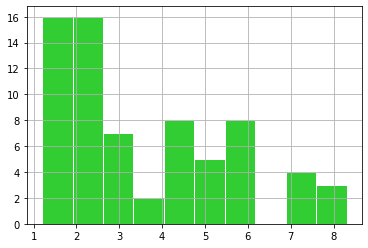

In [38]:
# шаг 2: строим простую гистограмму

df["diffc"].hist(color = "limegreen", edgecolor = "white");

Построим более красивую гистограмму:

In [40]:
from matplotlib import pyplot as plt

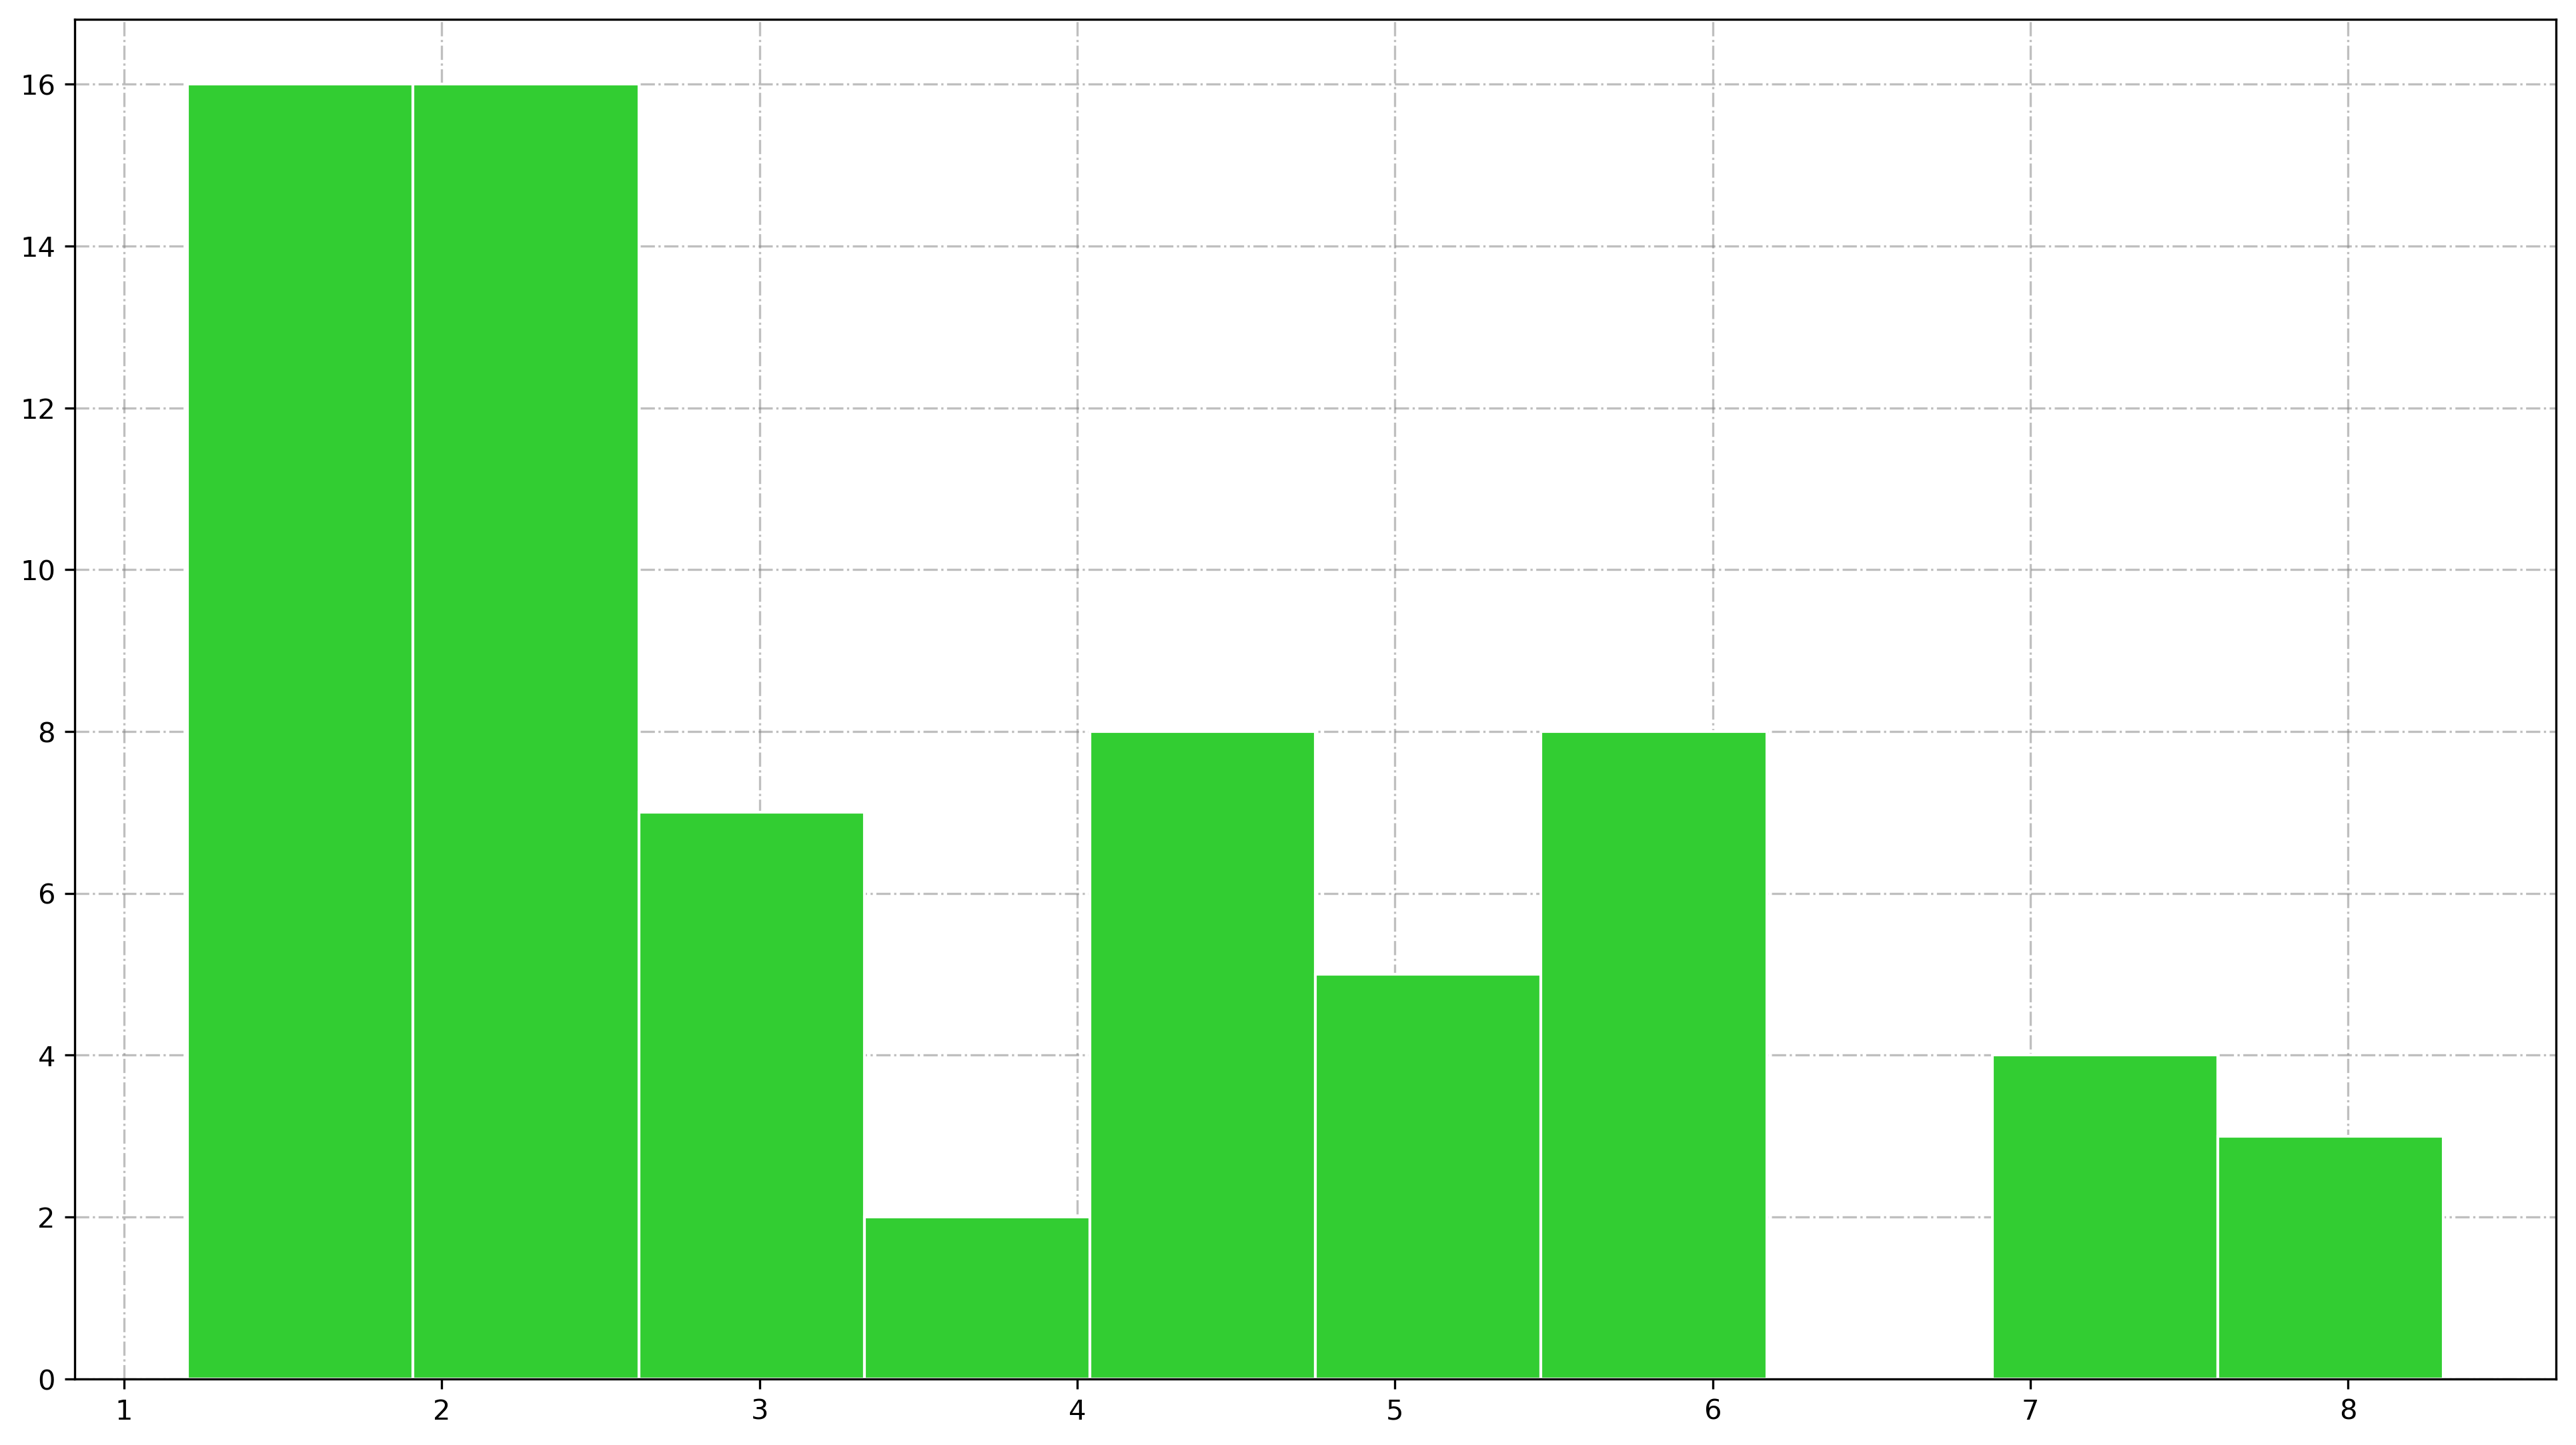

In [41]:
# fig – само изображение, которое потом выгрузим в файл
# ax – канва графика, в которой отрисовываем график
# редактируем ax, а после этого выгружаем fig в PNG-файл

# 16 на 9 дюймов, разрешение 300 точек на дюйм
# добавляем сетку и помещаем ее на задний план

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.set_axisbelow(True)
ax.grid(linestyle = "-.", color = "grey", alpha = 0.5);

# корректируем засечки по оси y, от 0 до 20 с шагом 2

ax.set_yticks(range(0, 20, 2));
ax.hist(df["diffc"], color = "limegreen", edgecolor = "white");
fig.savefig("hist.png")

### Задача 8*

Постройте столбиковую диаграмму, отражающую, новости в каких рубриках публикуются чаще, а в каких – реже.

In [43]:
# изучаем рубрики

df["rubrics"].value_counts()

Медицина                                     13
Физика                                       11
Астрономия                                   10
Химия                                         6
Зоология, Экология и климат                   4
Экология и климат                             4
Биология                                      3
Зоология                                      3
Археология                                    2
Роботы и дроны                                2
Антропология                                  2
Зоология, Биология                            1
Антропология, История                         1
Медицина, Коронавирусные хроники              1
Зоология, Экология и климат, Антропология     1
Космонавтика                                  1
Зоология, Антропология                        1
Медицина, Биология                            1
Авиация, Транспорт                            1
Физика, IT                                    1
Name: rubrics, dtype: int64

In [44]:
# формируем список уникальных рубрик

rubs_all = ", ".join(df["rubrics"].values)
print(rubs_all)

rubs = sorted(rubs_all.split(", "))
print(rubs)

Зоология, Биология, Медицина, Медицина, Астрономия, Физика, Зоология, Медицина, Медицина, Химия, Астрономия, Зоология, Экология и климат, Зоология, Медицина, Экология и климат, Авиация, Транспорт, Медицина, Биология, Медицина, Зоология, Экология и климат, Медицина, Зоология, Экология и климат, Антропология, Медицина, Медицина, Экология и климат, Роботы и дроны, Зоология, Антропология, Астрономия, Астрономия, Медицина, Астрономия, Космонавтика, Медицина, Биология, Медицина, Зоология, Экология и климат, Физика, Медицина, Астрономия, Химия, Зоология, Экология и климат, Химия, Антропология, Зоология, Роботы и дроны, Экология и климат, Биология, Медицина, Коронавирусные хроники, Экология и климат, Биология, Астрономия, Астрономия, Археология, Антропология, Астрономия, Астрономия, Физика, Археология, Антропология, История, Физика, Физика, Физика, Химия, Физика, Физика, Химия, Физика, IT, Физика, Химия, Физика, Физика
['IT', 'Авиация', 'Антропология', 'Антропология', 'Антропология', 'Антропол

In [45]:
# проверяем, как посчитать вхождение одной рубрики в rubrics

df["rubrics"].str.contains("Физика").sum()

12

In [46]:
#  создаем словарь с частотами для каждой рубрики
#  менее 2 раз -> категория Другое

data = {"Другое" : 0}

for r in rubs:
    s = df["rubrics"].str.contains(r).sum()
    if s < 2:
        data["Другое"] += 1
    else:
        data[r] = s
        
print(data)

{'Другое': 6, 'Антропология': 5, 'Археология': 2, 'Астрономия': 10, 'Биология': 5, 'Зоология': 10, 'Медицина': 15, 'Роботы и дроны': 2, 'Физика': 12, 'Химия': 6, 'Экология и климат': 9}


In [47]:
# создаем pandas Series на основе словаря
# сортируем по убыванию

tab = pd.Series(data)
tab = tab.sort_values(ascending=False)
tab

Медицина             15
Физика               12
Астрономия           10
Зоология             10
Экология и климат     9
Другое                6
Химия                 6
Антропология          5
Биология              5
Археология            2
Роботы и дроны        2
dtype: int64

In [48]:
# сохраняем отдельно категории и частоты

x = list(tab.index)
y = list(tab.values)
print(x, y)

['Медицина', 'Физика', 'Астрономия', 'Зоология', 'Экология и климат', 'Другое', 'Химия', 'Антропология', 'Биология', 'Археология', 'Роботы и дроны'] [15, 12, 10, 10, 9, 6, 6, 5, 5, 2, 2]


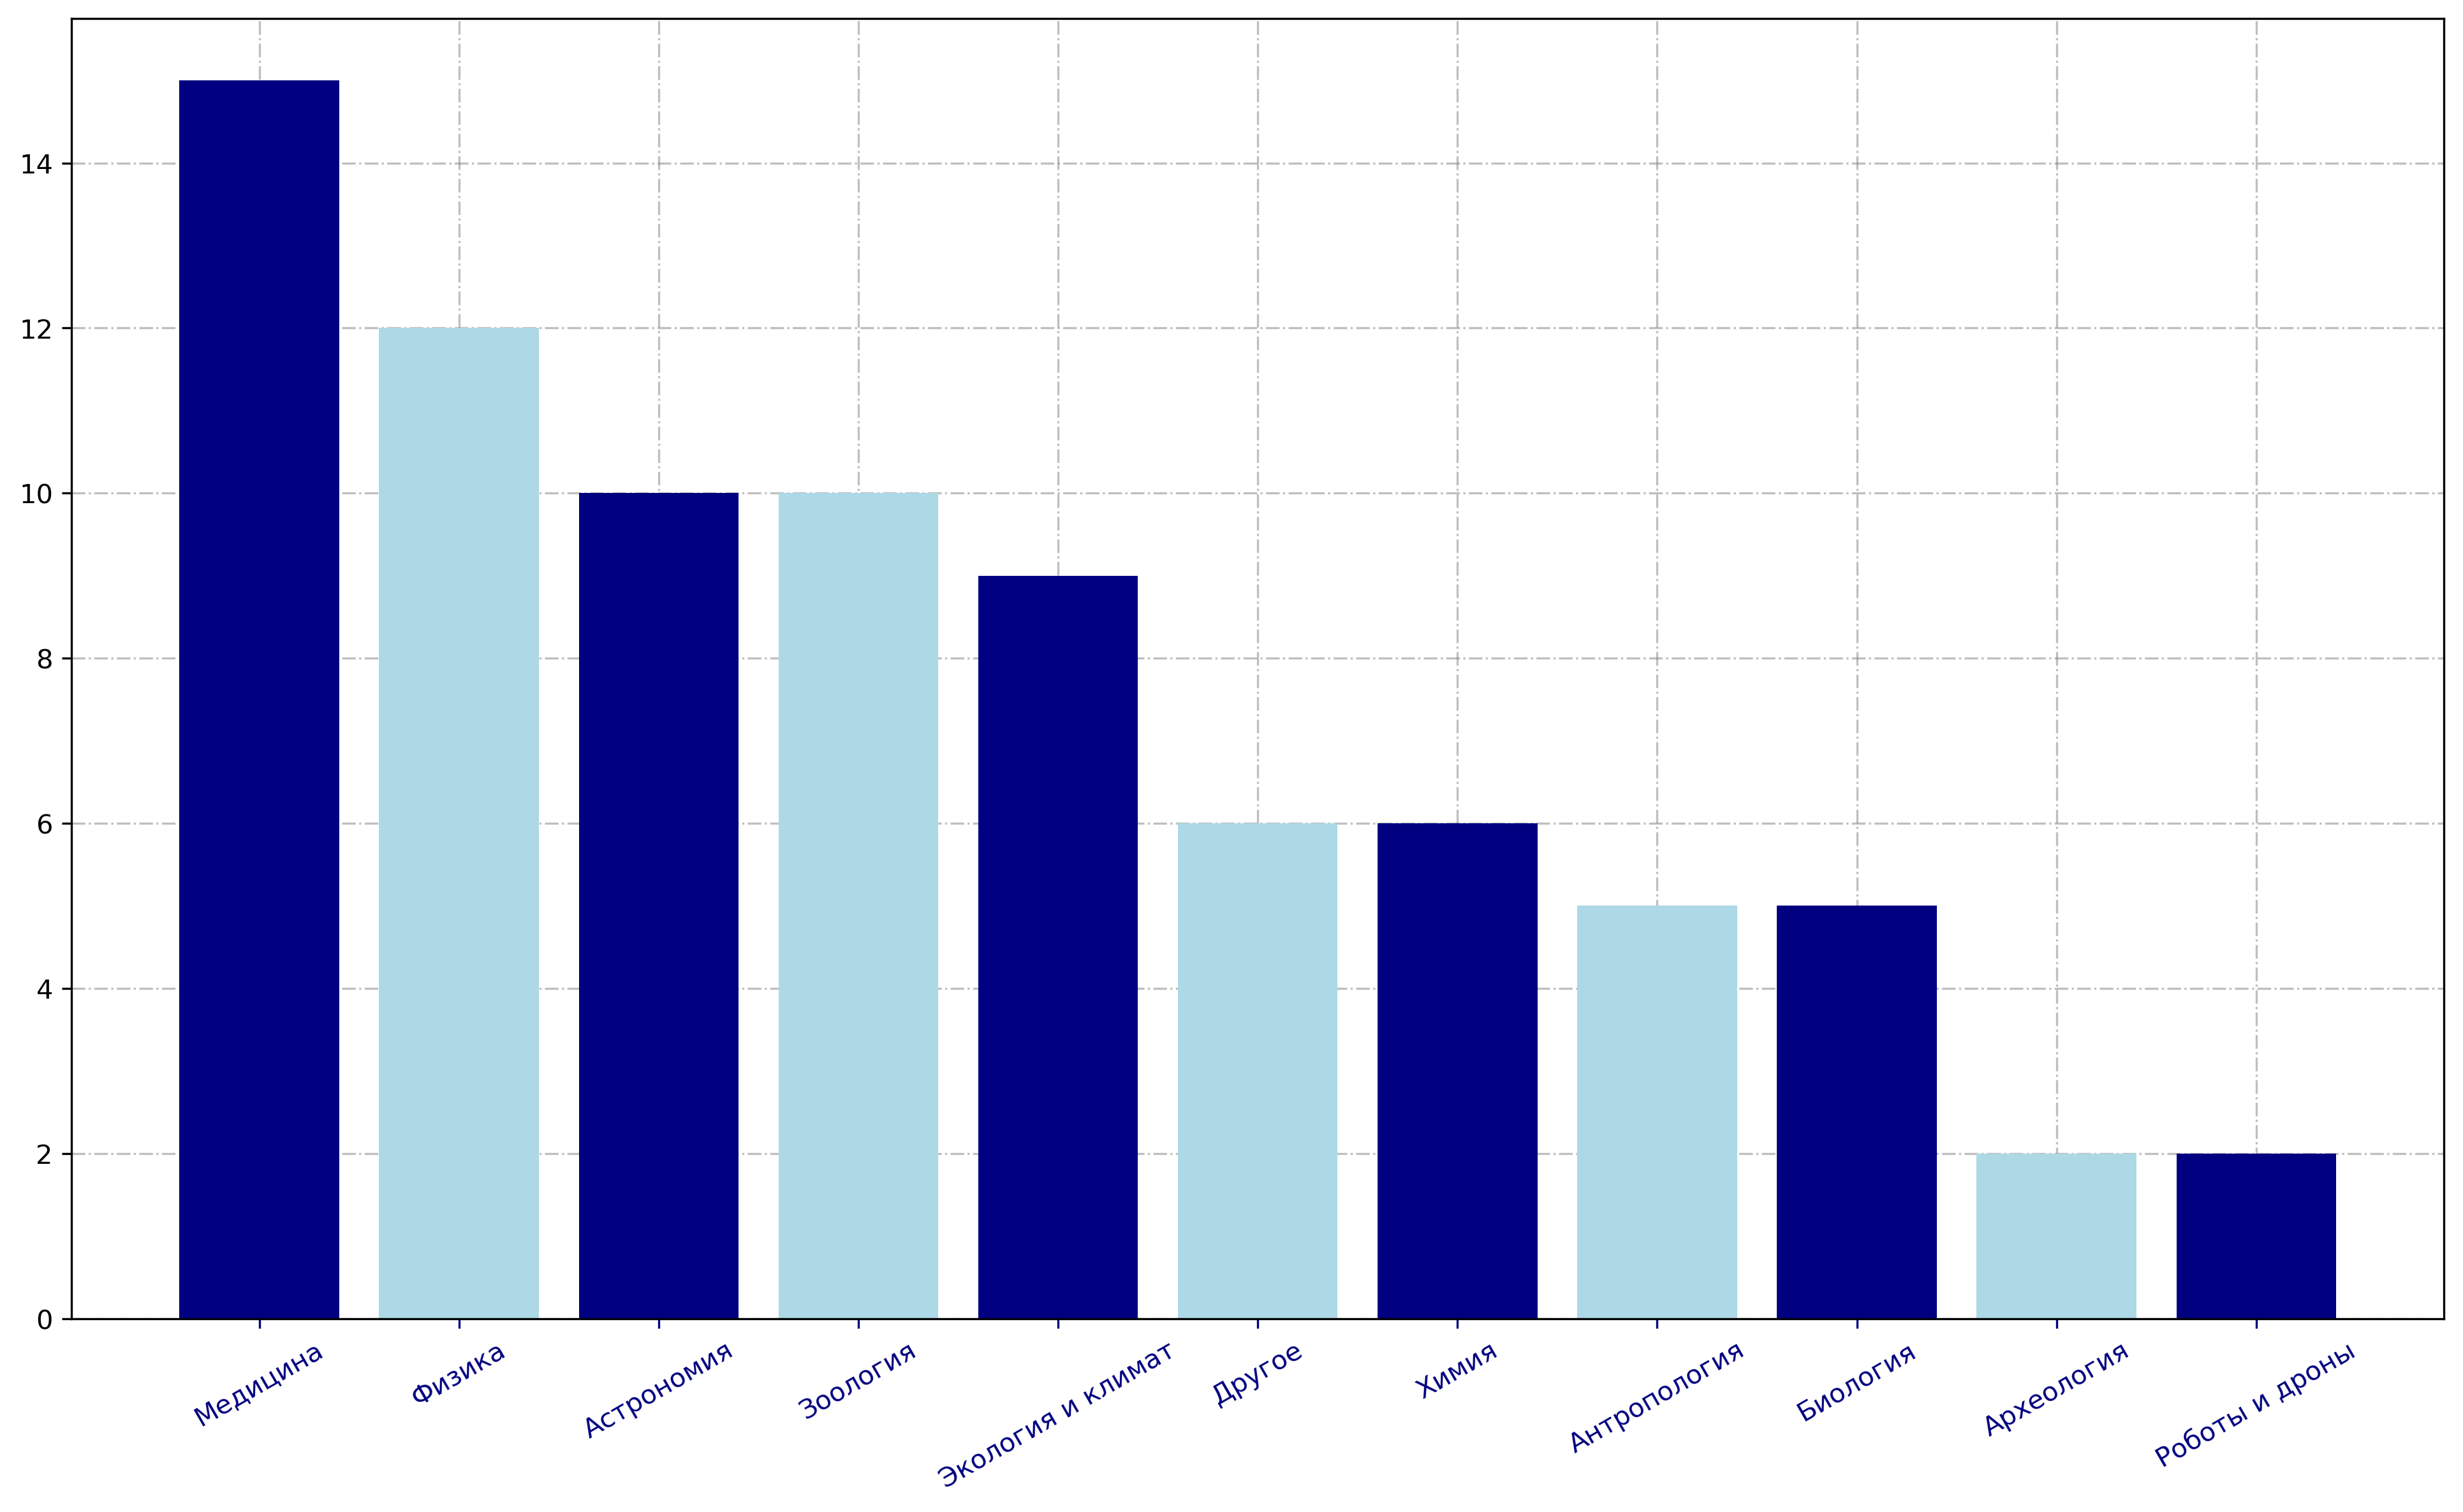

In [49]:
# строим столбиковую диаграмму

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

ax.set_axisbelow(True)
ax.grid(linestyle = "-.", color = "grey", alpha = 0.5);

ax.tick_params(axis = "x", rotation = 30, colors = "navy");

ax.bar(x, y, color = ["navy", "lightblue"]);
fig.savefig("bar.png")